<a href="https://colab.research.google.com/github/J3rmed/Estructura_de_Base_de_Datos/blob/main/merkle_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import hashlib

def hash_word(word):
    return hashlib.sha256(word.encode('utf-8')).hexdigest()

word = 'hola'
hashed_word = hash_word(word)

print(f"El hash SHA256 de '{word}' es: {hashed_word}")

El hash SHA256 de '1' es: 6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b


**hola Hola chao Chao**

In [ ]:
import hashlib,sys

class MerkleTreeNode:
    def __init__(self,value):
        self.left = None
        self.right = None
        self.value = value
        self.hashValue = hashlib.sha256(value.encode('utf-8')).hexdigest()

def buildTree(leaves,f):
    nodes = []
    for i in leaves:
        nodes.append(MerkleTreeNode(i))

    while len(nodes)!=1:
        temp = []
        for i in range(0,len(nodes),2):
            node1 = nodes[i]
            if i+1 < len(nodes):
                node2 = nodes[i+1]
            else:
                temp.append(nodes[i])
                break
            f.write("Left child : "+ node1.value + " | Hash : " + node1.hashValue +" \n")
            f.write("Right child : "+ node2.value + " | Hash : " + node2.hashValue +" \n")
            concatenatedHash = node1.hashValue + node2.hashValue
            parent = MerkleTreeNode(concatenatedHash)
            parent.left = node1
            parent.right = node2
            f.write("Parent(concatenation of "+ node1.value + " and " + node2.value + ") : " +parent.value + " | Hash : " + parent.hashValue +" \n")
            temp.append(parent)
        nodes = temp
    return nodes[0]

# words
leaves = ["hola", "Hola", "chao", "Chao"]

f = open("merkle.tree", "w")
root = buildTree(leaves,f)
f.close()

print(f"The Merkle root hash for {leaves} is: {root.hashValue}")

#Referencia:https://stackoverflow.com/questions/70316918/how-to-implement-merkle-hash-tree-in-python

The Merkle root hash for ['hola', 'Hola', 'chao', 'Chao'] is: 1dcc6cb96f24d989ce597dbe1982dc2ea7b5608f86fe019fed481eed5d228168


https://www.youtube.com/watch?v=Xj8Pt-bF4yo

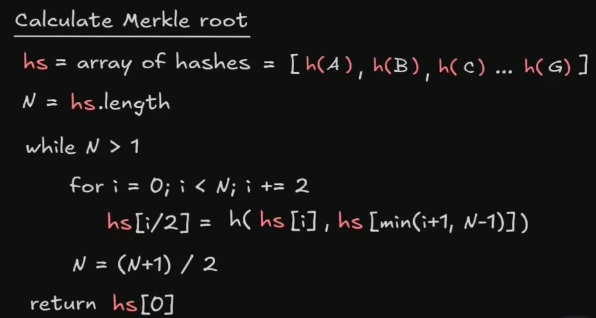